# Is Fandango's Movie Data Still Biased?

In a [article from 2015](https://fivethirtyeight.com/features/fandango-movies-ratings/), data was collected to show that the popular movie review aggregator Fandango, had a bias towards displaying a higher rating for a film than what it actually received. Fandango, in response to this article stated that the higher displayed ratings were due to a bug in their software, and not personal bias.

The aim of this project is to analyse more recent Fandango movie data and see if this bias is still apparent in their movie rankings, whether it be from a bug, or human bias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_score_comparison.csv')
post_fan = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
post_fan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [5]:
fandango_revised = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [6]:
fandango_revised

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [7]:
revised_post_fan = post_fan[['movie', 'year', 'fandango']].copy()

In [8]:
revised_post_fan

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


The population of interest in this study will be the Fandango movie ratings. We are trying to see if they have changed after the first analysis provided by data in the fandango dataframe.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing. It seems more likely that it isn't, mostly because this sample is subject to temporal trends (e.g., movies in 2015 might have been outstandingly good or bad compared to other years).


## Changing the Goal

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolating the samples

To isolate the 2015 samples first the 'FILM' Column in must be broken into a title and year column

In [9]:
prev_films = fandango_revised.copy()

In [10]:
prev_films[['Film', 'Year']] = prev_films['FILM'].str.split('(', expand=True)
prev_films['Year'] = prev_films['Year'].str.replace(')', '')
prev_films = prev_films.loc[(prev_films['Year'] == '2015')]


In [11]:
prev_films

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Film,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,Avengers: Age of Ultron,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,Cinderella,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,Ant-Man,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,Do You Believe?,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,Hot Tub Time Machine 2,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,The Water Diviner,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,Irrational Man,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,Shaun the Sheep Movie,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,Love & Mercy,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,Far From The Madding Crowd,2015


In [12]:
prev_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 7 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Film                    129 non-null object
Year                    129 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 8.1+ KB


Isolating the 2016 samples from the revised_post_fan dataframe

In [13]:
post_films = revised_post_fan.loc[(revised_post_fan['year'] == 2016)]

In [14]:
post_films

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


## Creating a Kernel Density Plot to Analyse data

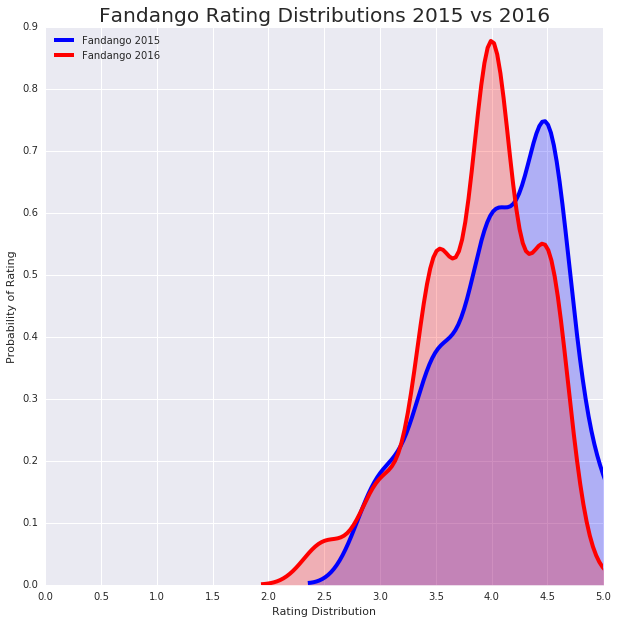

In [15]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('fivethirtyeight')
sns.kdeplot(prev_films['Fandango_Stars'], shade=True, color='b', label='Fandango 2015')
sns.kdeplot(post_films['fandango'], shade=True, color='r', label='Fandango 2016')
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim([0, 5])
plt.xlabel('Rating Distribution')
plt.ylabel('Probability of Rating')
plt.title('Fandango Rating Distributions 2015 vs 2016')

The 2015 distribution appears to be further biased towards higher ratings, but the 2016 distribution has a higher peak
This suggests that while the 2015 movie reviews were more likely to be higher, sitting around 4.5, 2016 reviews were much more likely to be rated around 4.0.

## Comparing Relative Frequencies

In [16]:
prev_films['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
post_films['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

On a whole ratings over 4 stars decreased significantly from 2015 to 2016. 5 star ratings dropped from 7% to 0.5% and 4.5 star ratings dropped from 38% to 24%.
4 star ratings increased significantly however in 2016 from 28% to 40%
Overall however, the less than 4 star ratings all had an increase in distribution, including a new distribution for 2.5 star ratings of 3%, which was not present in the 2015 data

Overall it seems that the general left direction shift observed in the KDE is accurate 

## Determining the Direction of the Change

In [53]:
prev_mean = prev_films['Fandango_Stars'].mean()
prev_median = prev_films['Fandango_Stars'].median()
prev_mode = prev_films['Fandango_Stars'].mode().iloc[0]
post_mean = post_films['fandango'].mean()
post_median = post_films['fandango'].median()
post_mode = post_films['fandango'].mode().iloc[0]



In [54]:
prev_mode

4.5

([<matplotlib.axis.YTick at 0x7f0dd25a1f98>,
 <a list of 11 Text yticklabel objects>)

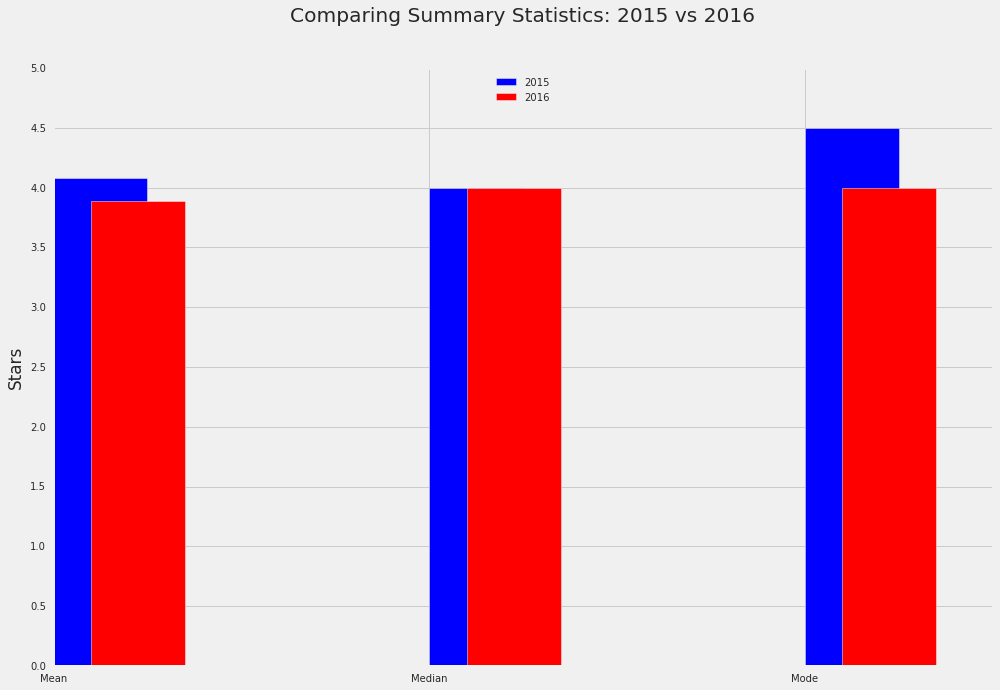

In [102]:
%matplotlib inline
plt.style.use('fivethirtyeight')
x_range = np.arange(3)
x= ['Mean', 'Median', 'Mode']
y = np.arange(0,5.5,0.5)
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(x_range, [prev_mean, prev_median, prev_mode], color='blue', width=0.25, label='2015')
plt.bar(x_range+0.1, [post_mean, post_median, post_mode], color='red', width=0.25, label = '2016')
plt.title('Comparing Summary Statistics: 2015 vs 2016', y = 1.07)
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.ylim([0, 5])
plt.xticks(x_range, x)
plt.yticks(y, y)

Based on this bar graph we can see that the mean and mode both decreased from 2015 to 2016. However, the median, which is not as affected by outliers as the mode, remained at 4 stars. 
Considering the decrease in mean and mode summary values, combined with evidence from the KDE and comparison of relative frequenceis, it would be a safe bet that on average, the rating of popular movies in 2016 was lower than that of 2015 on Fandango

# Conclusion